<a href="https://colab.research.google.com/github/ahamedistiaque/Computer-Vision/blob/main/YOLOV8_test_custom_PPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.5 MB/s eta 0:00:00


In [10]:
import os

# Replace with the actual path to your zip file on Google Drive
zip_file_path_on_drive = '/content/drive/MyDrive/Construction Site Safety.zip'

# Create a directory to extract the dataset into (optional but recommended)
dataset_dir = 'ppe_dataset_from_drive'
os.makedirs(dataset_dir, exist_ok=True)

# Unzip the file from Google Drive into the created directory
!unzip "{zip_file_path_on_drive}" -d {dataset_dir}

# List the contents of the extracted directory to verify
print(f"Contents of {dataset_dir}:")
!ls {dataset_dir}

Archive:  /content/drive/MyDrive/Construction Site Safety.zip
 extracting: ppe_dataset_from_drive/README.dataset.txt  
 extracting: ppe_dataset_from_drive/README.roboflow.txt  
 extracting: ppe_dataset_from_drive/data.yaml  
   creating: ppe_dataset_from_drive/test/
   creating: ppe_dataset_from_drive/test/images/
 extracting: ppe_dataset_from_drive/test/images/-4405-_png_jpg.rf.937688313347dbcd3b24201dd7882906.jpg  
 extracting: ppe_dataset_from_drive/test/images/000005_jpg.rf.c613c066b79795d219855aca269760e6.jpg  
 extracting: ppe_dataset_from_drive/test/images/002551_jpg.rf.b09484b130c1587abfa8365c3d774bf1.jpg  
 extracting: ppe_dataset_from_drive/test/images/003357_jpg.rf.9fb1f2cebc239b4276a81ce2cbf9e911.jpg  
 extracting: ppe_dataset_from_drive/test/images/004063_jpg.rf.6ecc587c20a87ec176841aea39b8f5db.jpg  
 extracting: ppe_dataset_from_drive/test/images/004763_jpg.rf.c8f1bd1cb7cf6037f7c90a6c213d6364.jpg  
 extracting: ppe_dataset_from_drive/test/images/006463_jpg.rf.f134bfc3f96f

In [12]:
# Path to the data.yaml file in your extracted dataset directory
# This file specifies the paths to the train, val, and test images/labels
# and the class names.
data_yaml_path = '/content/ppe_dataset_from_drive/data.yaml'

# You can optionally load and inspect the contents of the data.yaml file
# import yaml
# with open(data_yaml_path, 'r') as f:
#     data = yaml.safe_load(f)
# print(data)

In [13]:
from ultralytics import YOLO

# Load the large pretrained model (yolov8l.pt)
model = YOLO('yolov8l.pt')  # Downloads automatically if not present

# Train the model
results = model.train(
    data=data_yaml_path,  # Path to your data.yaml
    epochs=50,  # Number of epochs (start small, e.g., 10-50; increase for better accuracy)
    imgsz=640,  # Image size (640 is standard)
    batch=16,   # Batch size (adjust based on GPU memory; T4 can handle 16)
    name='person_detection_model'  # Save folder name
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/ppe_dataset_from_drive/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=person_detection_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

  8                  -1  3   4461568  ultralytics.nn.modules.block.C2f             [512, 512, 3, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   4723712  ultralytics.nn.modules.block.C2f             [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  3   1247744  ultralytics.nn.modules.block.C2f             [768, 256, 3]                 
 16                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256,

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1927.5±753.7 MB/s, size: 94.2 KB)


train: Scanning /content/ppe_dataset_from_drive/train/labels... 521 images, 34 backgrounds, 0 corrupt: 100%|██████████| 521/521 [00:00<00:00, 2437.70it/s]

train: New cache created: /content/ppe_dataset_from_drive/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 943.5±1046.8 MB/s, size: 111.2 KB)


val: Scanning /content/ppe_dataset_from_drive/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 1943.73it/s]

val: New cache created: /content/ppe_dataset_from_drive/valid/labels.cache


Plotting labels to runs/detect/person_detection_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/person_detection_model
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.24G      1.222        2.7      1.366        148        640: 100%|██████████| 33/33 [00:27<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        114        733      0.474      0.409      0.376      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.87G      1.168      1.633      1.306        183        640: 100%|██████████| 33/33 [00:24<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        114        733       0.52      0.288      0.289      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.89G      1.246      1.554      1.343        223        640: 100%|██████████| 33/33 [00:25<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        114        733      0.502      0.377      0.335      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.64G      1.197      1.442      1.314        264        640: 100%|██████████| 33/33 [00:26<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        114        733       0.58      0.353      0.368      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.89G      1.199      1.388      1.307         95        640: 100%|██████████| 33/33 [00:27<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        114        733      0.539      0.375       0.39      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.71G      1.183       1.31      1.309        156        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        114        733      0.667      0.324      0.363      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.62G      1.158      1.243      1.313        148        640: 100%|██████████| 33/33 [00:26<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        114        733      0.501      0.412      0.438      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.68G      1.108      1.194      1.302         80        640: 100%|██████████| 33/33 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        114        733      0.803      0.375       0.47      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.89G      1.087      1.115      1.261        121        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        114        733      0.664      0.419       0.45      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.65G      1.104      1.082      1.255        112        640: 100%|██████████| 33/33 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        114        733      0.569      0.447      0.449      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.67G      1.057      1.065      1.228        167        640: 100%|██████████| 33/33 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        114        733      0.719      0.393      0.508       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.61G      1.038      1.042      1.239         92        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        114        733      0.592       0.37      0.416      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.69G      1.045      1.016       1.23        106        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        114        733      0.801      0.401      0.488      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.64G      1.036      0.973      1.225        133        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        114        733       0.52       0.46      0.478      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.66G     0.9631     0.9141      1.179        184        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        114        733      0.825      0.415      0.532      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.54G     0.9689      0.854      1.168        188        640: 100%|██████████| 33/33 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        114        733      0.773      0.444       0.51      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.62G     0.9553     0.8243      1.161        155        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        114        733      0.708      0.469      0.521      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.72G     0.9545     0.8099      1.155        106        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        114        733       0.81      0.402       0.54      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       9.7G     0.9377     0.8262      1.165        195        640: 100%|██████████| 33/33 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        114        733      0.736      0.451      0.554      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.64G     0.8987     0.7843      1.134        198        640: 100%|██████████| 33/33 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        114        733      0.584      0.498      0.546       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.91G     0.8914     0.7627      1.128        108        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        114        733      0.701      0.474      0.526      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.67G     0.8475     0.6933       1.11        118        640: 100%|██████████| 33/33 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        114        733      0.714        0.5      0.573      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.48G     0.8583     0.7122      1.107        140        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        114        733      0.755      0.482      0.559      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.69G     0.8399     0.7098      1.099         99        640: 100%|██████████| 33/33 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        114        733      0.711      0.491      0.564      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.92G     0.8583      0.707      1.108        195        640: 100%|██████████| 33/33 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        114        733      0.695      0.458      0.551      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.72G     0.8153     0.6549      1.082        113        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        114        733      0.706      0.472      0.515      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.71G     0.8226     0.6632      1.082        133        640: 100%|██████████| 33/33 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        114        733      0.771      0.458      0.556      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.52G     0.7935     0.6233      1.068        120        640: 100%|██████████| 33/33 [00:27<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        114        733      0.659      0.526      0.544      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       9.6G     0.7719     0.6185      1.053        148        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        114        733      0.609      0.519       0.56      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.52G     0.7651     0.6121      1.056        224        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        114        733      0.714      0.485      0.566      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.59G     0.7654     0.5955      1.056        178        640: 100%|██████████| 33/33 [00:26<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        114        733      0.792      0.468      0.575      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.66G     0.7429     0.5746      1.029        131        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        114        733      0.814      0.469      0.577      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       9.8G     0.7284     0.5555       1.04        201        640: 100%|██████████| 33/33 [00:27<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        114        733      0.767      0.487      0.571      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.89G     0.7185     0.5442      1.031        145        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        114        733      0.711      0.514      0.571      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.53G     0.7094     0.5387      1.016        196        640: 100%|██████████| 33/33 [00:27<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        114        733      0.829      0.486      0.591      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       9.6G     0.7212     0.5223      1.019        107        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        114        733      0.798      0.485      0.562      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.92G     0.6874     0.5131       1.01        128        640: 100%|██████████| 33/33 [00:27<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        114        733      0.776      0.491      0.571      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       9.4G     0.6916     0.5086     0.9991        167        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        114        733      0.614      0.551      0.574       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.58G     0.6895      0.509      1.004        176        640: 100%|██████████| 33/33 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        114        733      0.604      0.528      0.567      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.67G     0.6402     0.4696     0.9881        107        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        114        733      0.838      0.486        0.6      0.424


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.87G     0.6757     0.4584     0.9607        127        640: 100%|██████████| 33/33 [00:27<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        114        733      0.759      0.475      0.584       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       9.6G     0.6191     0.4038     0.9282        107        640: 100%|██████████| 33/33 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        114        733      0.749      0.494      0.601      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       9.6G     0.6134     0.3955     0.9403        174        640: 100%|██████████| 33/33 [00:26<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        114        733      0.766      0.505      0.607      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.61G     0.6062     0.3828     0.9244         60        640: 100%|██████████| 33/33 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        114        733      0.755      0.499      0.619      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.82G     0.5762     0.3588     0.9074         44        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        114        733      0.796      0.496      0.598      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.62G     0.5933     0.3781     0.9187         51        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        114        733      0.802      0.504      0.603      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.62G     0.5696     0.3552     0.9042         52        640: 100%|██████████| 33/33 [00:26<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        114        733      0.855      0.497      0.604      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.46G     0.5659     0.3517     0.9209         35        640: 100%|██████████| 33/33 [00:26<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        114        733      0.842      0.507      0.602      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.88G     0.5511     0.3473     0.9032         58        640: 100%|██████████| 33/33 [00:26<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        114        733      0.826      0.505      0.603      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       9.6G     0.5388     0.3394     0.8974        131        640: 100%|██████████| 33/33 [00:26<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        114        733      0.817       0.51      0.609      0.428



50 epochs completed in 0.465 hours.
Optimizer stripped from runs/detect/person_detection_model/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/person_detection_model/weights/best.pt, 87.7MB

Validating runs/detect/person_detection_model/weights/best.pt...
Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,625,883 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


                   all        114        733      0.853      0.497      0.604      0.432
             Excavator         10         12      0.816      0.739      0.767      0.677
                Gloves         11         25      0.845       0.44      0.457       0.25
               Hardhat         42         79      0.947      0.674      0.818      0.601
                Ladder          8         10      0.576        0.6       0.57      0.431
                  Mask         19         21      0.838       0.81      0.808      0.632
            NO-Hardhat         37         69      0.874      0.522      0.613      0.354
               NO-Mask         44         74      0.845      0.443      0.554      0.195
        NO-Safety Vest         56        106      0.931      0.508      0.721      0.419
                Person         84        166      0.906      0.642      0.814      0.628
           Safety Cone         13         44      0.953      0.864      0.879      0.501
           Safety Ves

In [18]:
# Load your trained model (use the best weights)
model = YOLO('/content/runs/detect/person_detection_model/weights/best.pt')

# Validate on the validation set
metrics = model.val(data='/content/ppe_dataset_from_drive/data.yaml')

# Print key metrics
print("Validation Results:")
print(f"Precision: {metrics.box.p:.4f}")  # Direct formatting for scalar
print(f"Recall: {metrics.box.r:.4f}")     # Direct formatting for scalar
print(f"mAP@0.5: {metrics.box.map50:.4f}")  # Direct formatting for scalar
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")  # Direct formatting for scalar

Ultralytics 8.3.183 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,625,883 parameters, 0 gradients, 164.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1919.5±939.8 MB/s, size: 76.7 KB)


val: Scanning /content/ppe_dataset_from_drive/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]


                   all        114        733      0.854      0.498      0.606      0.432
             Excavator         10         12      0.816       0.74      0.766      0.676
                Gloves         11         25      0.846       0.44      0.451      0.237
               Hardhat         42         79      0.947      0.674       0.82      0.607
                Ladder          8         10      0.576        0.6      0.589      0.439
                  Mask         19         21      0.838       0.81      0.808      0.631
            NO-Hardhat         37         69      0.873      0.522      0.625      0.357
               NO-Mask         44         74      0.843      0.436      0.548      0.193
        NO-Safety Vest         56        106      0.931      0.508       0.72      0.425
                Person         84        166      0.906      0.642      0.813      0.627
           Safety Cone         13         44      0.978      0.886      0.896      0.506
           Safety Ves

TypeError: unsupported format string passed to numpy.ndarray.__format__


image 1/1 /content/drive/MyDrive/test.jpg: 448x640 1 Gloves, 2 Hardhats, 2 NO-Masks, 2 Persons, 2 Safety Vests, 53.9ms
Speed: 2.7ms preprocess, 53.9ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


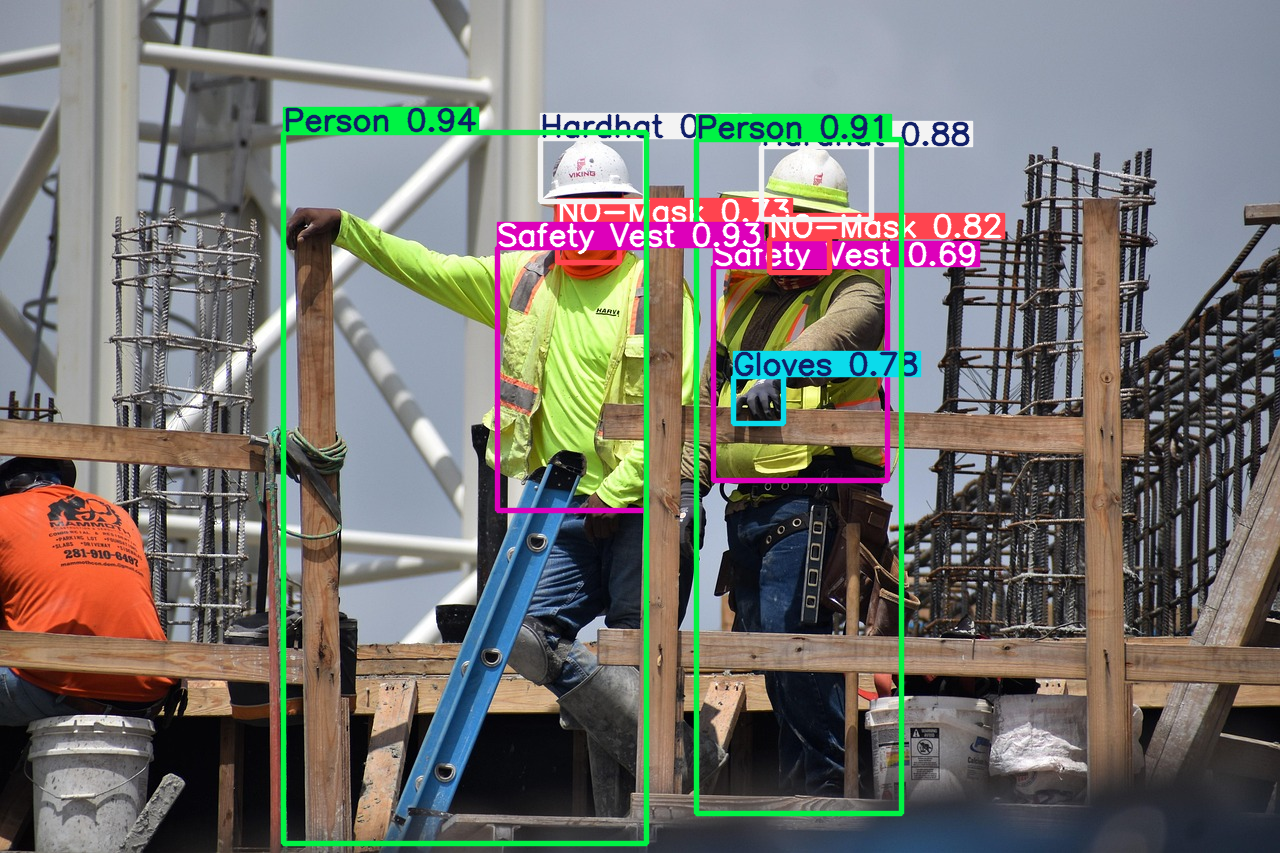

In [21]:
# Inference on a single image (upload an image to Colab or use path)
results = model('/content/drive/MyDrive/test.jpg')  # Replace with your image path

# Show results
results[0].show()  # Displays the image with bounding boxes in Colab

# Or save: results[0].save('output.jpg')